<a href="https://colab.research.google.com/github/missjanki/Introduction-to-Machine-Learning-/blob/main/Permittivity_prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

**LOADING DATASET**

In [ ]:
dataset = pd.read_excel('/content/EPSILON PRIME AND DOUBLE PRIME.xlsx')
dataset.sample(5)

,Concentration,Frequency,epsilon prime,epsilon double prime
3367,0.80,119132.0,5.418909,0.005956
389,0.05,1002370.0,16.346926,0.661677
361,0.05,200000.0,16.376250,3.360112
3594,1.00,532145.0,2.782096,-0.001657
2747,0.65,44774.4,7.534552,0.368215


In [ ]:
df = dataset.copy()
df.sample(5)

,Concentration,Frequency,epsilon prime,epsilon double prime
2420,0.59,31.6979,7.929936,915.988730
153,0.00,133669.0000,17.229144,6.112323
580,0.09,563677.0000,15.899799,1.232203
1233,0.28,94.6303,14.002973,1914.410615
215,0.05,44.7744,49.415244,14301.371785


In [ ]:
df.shape

(3618, 4)

In [ ]:
print(df.isnull().sum())                            #finding missing or null values

Concentration           0
Frequency               0
epsilon prime           0
epsilon double prime    0
dtype: int64


**FEATURE SCALING WITH STANDARD SCALER**

In [ ]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df)  # Assuming 'data_ml' is your original dataset

# Create DataFrame with the appropriate number of columns
df = pd.DataFrame(scaled_data, columns=['Concentration', 'Frequency', 'epsilon prime', 'epsilon double prime'])  # Adjust column names accordingly
# In the above line, replace 'additional_column' with the appropriate name if there's an extra column present in the transformed data

**DATA VISUALIZATION**

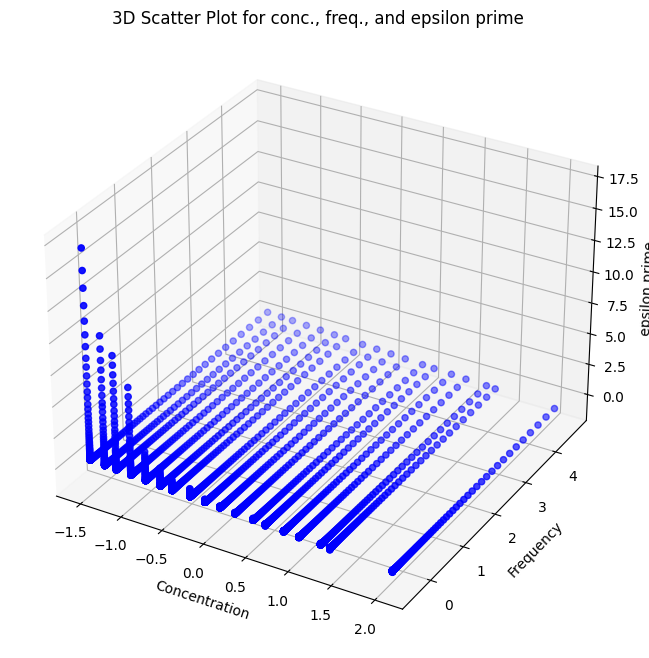

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Concentration'], df['Frequency'], df['epsilon prime'], c='blue', marker='o')
ax.set_xlabel('Concentration')
ax.set_ylabel('Frequency')
ax.set_zlabel('epsilon prime')
plt.title('3D Scatter Plot for conc., freq., and epsilon prime')
plt.show()

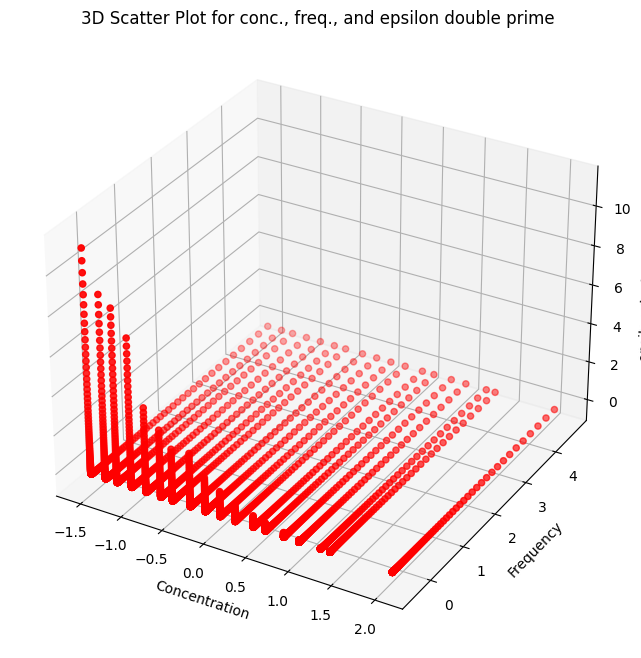

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Concentration'], df['Frequency'], df['epsilon double prime'], c='red', marker='o')
ax.set_xlabel('Concentration')
ax.set_ylabel('Frequency')
ax.set_zlabel('epsilon double prime')
plt.title('3D Scatter Plot for conc., freq., and epsilon double prime')
plt.show()

**MODEL: MULTIPLE LINEAR REGRESSION**

EPSILON PRIME

In [ ]:
X = df.drop('epsilon prime', axis=1)        #input variable
Y = df['epsilon prime']                     #target variable

In [ ]:
print(X)

      Concentration  Frequency  epsilon double prime
0         -1.537379  -0.457158             11.146447
1         -1.537379  -0.457155             10.527300
2         -1.537379  -0.457152              9.945604
3         -1.537379  -0.457149              9.393377
4         -1.537379  -0.457145              8.870185
...             ...        ...                   ...
3613       2.051833   3.626289             -0.285272
3614       2.051833   3.868241             -0.285272
3615       2.051833   4.124536             -0.285272
3616       2.051833   4.396022             -0.285272
3617       2.051833   4.683599             -0.285273

[3618 rows x 3 columns]


In [ ]:
print(Y)

0       16.997344
1       15.286212
2       13.937844
3       12.597034
4       11.400223
          ...    
3613    -0.782086
3614    -0.782107
3615    -0.782163
3616    -0.782221
3617    -0.782303
Name: epsilon prime, Length: 3618, dtype: float64


**SPLITTING DATASET INTO TRAINING AND TESTING**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
ml = LinearRegression()
ml.fit(X_train, Y_train)
Y_pred = ml.predict(X_test)
print(Y_pred)

[ 1.86756127 -0.36045805 -0.59450737 ... -0.59458679 -0.45093907
 -0.39154335]


In [ ]:
ml.predict([[ 0.80,	119132.0, 0.005956 ]])

array([4342.7790254])

**ACCURACY OF TRAINING DATA**

In [ ]:
from sklearn.metrics import accuracy_score, r2_score

# accuracy score on training data
X_train_prediction = ml.predict(X_train)
training_data_accuracy = r2_score(Y_train, X_train_prediction)
print('Accuracy score of the training data:', training_data_accuracy)


Accuracy score of the training data: 0.8872072110377488


**ACCURACY OF TESTING DATA**

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy score on training data
X_test_prediction = ml.predict(X_test)
test_data_accuracy = r2_score(Y_test, X_test_prediction)
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.8833552515219676


**ACCURACY SCORE**

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)


0.8833552515219676

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r_squared = r2_score(Y_test, Y_pred)

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.14719171025087302
Mean Squared Error: 0.13718175045859038
Root Mean Squared Error: 0.3703805481644391
R-squared: 0.8833552515219676


In [ ]:
pred_Y_df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_pred, 'Difference': Y_test-Y_pred})
pred_Y_df[0:20]

,Actual Value,Predicted Value,Difference
227,1.089265,1.867561,-0.778296
2291,-0.280547,-0.360458,0.079911
3304,-0.576487,-0.594507,0.018020
2161,-0.242835,-0.299329,0.056494
2545,-0.353966,-0.398163,0.044197
2810,-0.414470,-0.299799,-0.114671
2453,-0.316062,-0.368099,0.052037
2677,-0.389385,-0.452216,0.062831
1980,-0.169789,-0.229404,0.059615
2012,-0.175769,0.305275,-0.481044


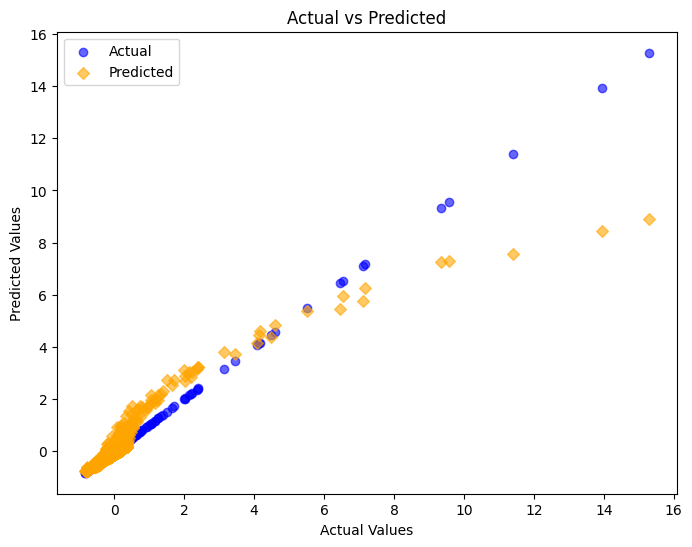

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test, color='blue', marker='o', label='Actual', alpha=0.6)
plt.scatter(Y_test, Y_pred, color='orange', marker='D', label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

DOUBLE EPSILON PRIME

In [ ]:
X = df.drop('epsilon double prime', axis=1)        #input
Y = df['epsilon double prime']                     #target

In [ ]:
print(X)

      Concentration  Frequency  epsilon prime
0         -1.537379  -0.457158      16.997344
1         -1.537379  -0.457155      15.286212
2         -1.537379  -0.457152      13.937844
3         -1.537379  -0.457149      12.597034
4         -1.537379  -0.457145      11.400223
...             ...        ...            ...
3613       2.051833   3.626289      -0.782086
3614       2.051833   3.868241      -0.782107
3615       2.051833   4.124536      -0.782163
3616       2.051833   4.396022      -0.782221
3617       2.051833   4.683599      -0.782303

[3618 rows x 3 columns]


In [ ]:
print(Y)

0       11.146447
1       10.527300
2        9.945604
3        9.393377
4        8.870185
          ...    
3613    -0.285272
3614    -0.285272
3615    -0.285272
3616    -0.285272
3617    -0.285273
Name: epsilon double prime, Length: 3618, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
ml = LinearRegression()
ml.fit(X_train, Y_train)
Y_pred = ml.predict(X_test)
print(Y_pred)

[ 0.87066757 -0.16274688 -0.27295561 ... -0.27242785 -0.1943139
 -0.42292637]


In [ ]:
ml.predict([[ 0.05,	200000.0,	16.376250	 ]])

array([-11694.75480151])

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# accuracy score on training data
X_train_prediction = ml.predict(X_train)
training_data_accuracy = r2_score(Y_train, X_train_prediction)
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.8629181348850299


In [ ]:
from sklearn.metrics import accuracy_score

# accuracy score on training data
X_test_prediction = ml.predict(X_test)
test_data_accuracy = r2_score(Y_test, X_test_prediction)
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.8624510937665815


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.8624510937665815

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r_squared = r2_score(Y_test, Y_pred)

# Print the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 0.20166643056910066
Mean Squared Error: 0.1436412668552395
Root Mean Squared Error: 0.37900035205160365
R-squared: 0.8624510937665815


In [ ]:
pred_Y_df = pd.DataFrame({'Actual Value': Y_test, 'Predicted Value': Y_pred, 'Difference': Y_test-Y_pred})
pred_Y_df[0:20]

,Actual Value,Predicted Value,Difference
227,1.904438,0.870668,1.033770
2291,-0.279118,-0.162747,-0.116371
3304,-0.285188,-0.272956,-0.012233
2161,-0.285119,-0.188788,-0.096331
2545,-0.285040,-0.213660,-0.071381
2810,-0.285464,-0.476004,0.190540
2453,-0.243083,-0.167713,-0.075371
2677,-0.279056,-0.196610,-0.082446
1980,-0.285195,-0.191072,-0.094123
2012,0.474638,-0.100765,0.575403


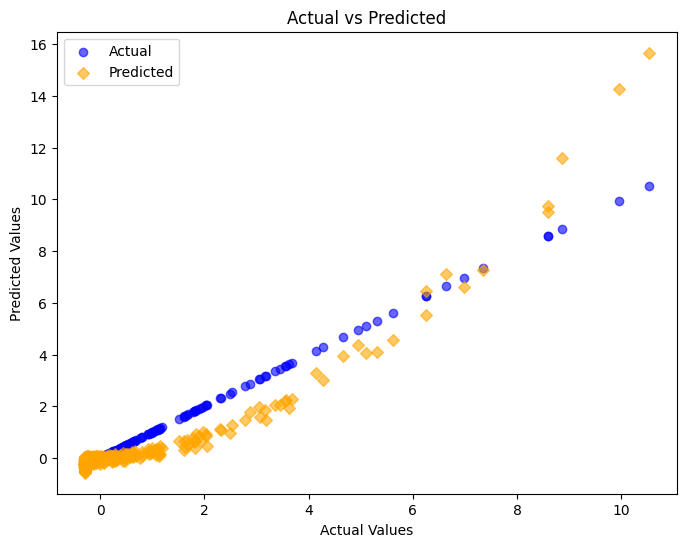

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_test, color='blue', marker='o', label='Actual', alpha=0.6)
plt.scatter(Y_test, Y_pred, color='orange', marker='D', label='Predicted', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()